<a href="https://colab.research.google.com/github/na0260/data-minig-lab/blob/main/DmReport03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

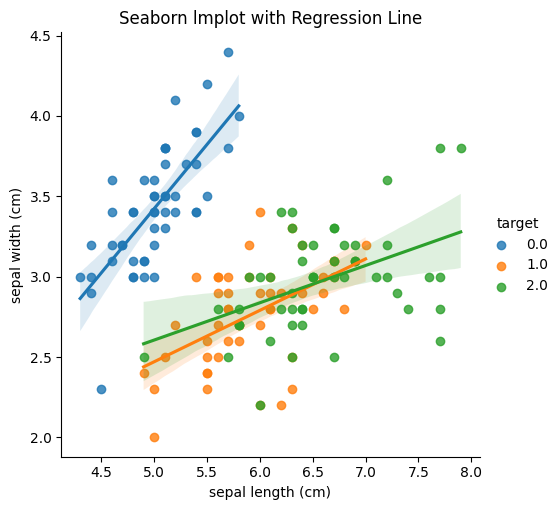

Linear Regression Metrics:
MAE: 0.1533226562712966
MSE: 0.03866591237825791
RMSE: 0.19663649808277686
Logistic Regression Accuracy: 1.0


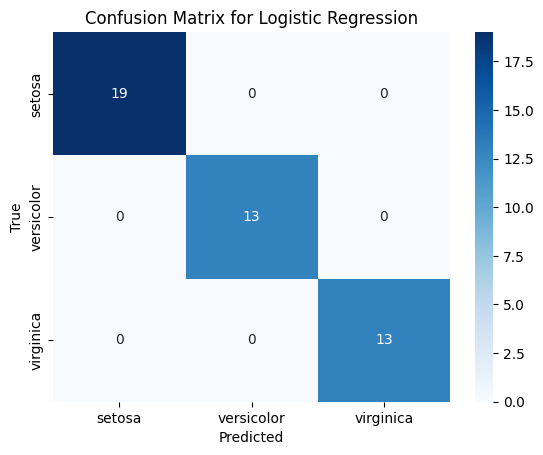

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
Y = iris_df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

Y_pred_linear = linear_regressor.predict(X_test)

sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_df, hue='target', fit_reg=True)
plt.title('Seaborn lmplot with Regression Line')
plt.show()

mae_linear = mean_absolute_error(y_true=Y_test, y_pred=Y_pred_linear)
mse_linear = mean_squared_error(y_true=Y_test, y_pred=Y_pred_linear)
rmse_linear = mean_squared_error(y_true=Y_test, y_pred=Y_pred_linear, squared=False)
print("Linear Regression Metrics:")
print("MAE:", mae_linear)
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)

logistic_regressor = LogisticRegression(max_iter=1000)
logistic_regressor.fit(X_train, Y_train)

Y_pred_logistic = logistic_regressor.predict(X_test)

accuracy_logistic = accuracy_score(y_true=Y_test, y_pred=Y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred_logistic)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()